Exploring an SQL database using python

In [11]:
%matplotlib inline
import pandas as pd
import sqlite3
import matplotlib as plt

connect = sqlite3.connect("factbook.db")
q = 'SELECT * FROM sqlite_master WHERE type="table";'
pd.read_sql_query(q, connect)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
#Display the first 5 rows of the facts table
q2 = 'SELECT * FROM facts LIMIT 5;'
pd.read_sql_query(q2, connect)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [7]:
q3 = 'SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM FACTS;'
pd.read_sql_query(q3, connect)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bf0e1f470>,
      dtype=object)

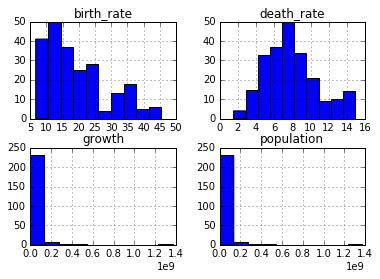

In [14]:
#Exclude outlier rows
q4 = 'SELECT population, population growth, birth_rate, death_rate FROM FACTS WHERE population > 0 and population < 7000000000;'
results = pd.read_sql_query(q4, connect)
pd.DataFrame.hist(results)


In [16]:
# What countries have highest population density (people per sq. km)?
q5 = 'SELECT name, population / area_land as population_density FROM FACTS ORDER BY population_density DESC LIMIT 20;'
pd.read_sql_query(q5, connect)


,name,population_density
0,Macau,21168
1,Monaco,15267
2,Singapore,8259
3,Hong Kong,6655
4,Gaza Strip,5191
5,Gibraltar,4876
6,Bahrain,1771
7,Maldives,1319
8,Malta,1310
9,Bermuda,1299


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bf10d6a58>]],
      dtype=object)

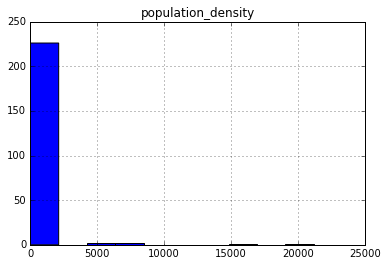

In [17]:
#Histogram of Population Density (people per sq. km)
q6 = 'SELECT population / area_land as population_density FROM FACTS WHERE population > 0 and population < 7000000000;'
results = pd.read_sql_query(q6, connect)
pd.DataFrame.hist(results)


In [23]:
# What countries have the highest ratios of water to land?
q7 = 'SELECT name, CAST(area_water as float) / CAST(area_land as float) as water_to_land FROM FACTS ORDER BY water_to_land DESC LIMIT 20;'
pd.read_sql_query(q7, connect)


,name,water_to_land
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


In [24]:
# What countries have more water than land?
q8 = 'SELECT name, area_water, area_land FROM FACTS WHERE area_water > area_land;'
pd.read_sql_query(q8, connect)


,name,area_water,area_land
0,British Indian Ocean Territory,54340,60
1,Virgin Islands,1564,346
